In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.cluster import DBSCAN, KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
####################################################
# Load the data
df = pd.read_csv("n/full_data_flightdelay.csv.xz", compression='xz')
# df = pd.read_csv("test.csv.xz", compression='xz')
#print(df.head())

# take a random sample of 1000 rows
df = df.sample(n=10000)

ontime = df[df['DEP_DEL15'] == 0]
delayed = df[df['DEP_DEL15'] == 1]

In [2]:
df.shape


(10000, 26)

In [3]:
df.describe()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,...,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,LATITUDE,LONGITUDE,PRCP,SNOW,SNWD,TMAX,AWND
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,6.629300,3.955000,0.182300,3.821800,3.030000,28.183700,133.635600,12727.265000,62633.864300,3477.377900,...,0.000097,0.000136,11.381700,36.752502,-93.908772,0.106287,0.028290,0.096460,71.448390,8.299368
std,3.384705,2.009522,0.386111,2.371204,1.734532,21.759547,46.752946,8866.967782,34428.162401,4309.187632,...,0.000087,0.000046,6.950887,5.594268,17.833829,0.376250,0.280026,0.788096,18.225663,3.589484
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,44.000000,1100.000000,5582.000000,4.000000,...,0.000000,0.000007,0.000000,19.739000,-159.346000,0.000000,0.000000,0.000000,-10.000000,0.000000
25%,4.000000,2.000000,0.000000,2.000000,2.000000,11.000000,90.000000,5353.000000,24886.000000,647.000000,...,0.000034,0.000099,5.000000,33.436000,-104.880000,0.000000,0.000000,0.000000,59.000000,5.820000
50%,7.000000,4.000000,0.000000,3.000000,3.000000,23.000000,143.000000,11587.000000,70473.000000,2196.000000,...,0.000062,0.000125,12.000000,37.505000,-87.906000,0.000000,0.000000,0.000000,74.000000,7.610000
75%,10.000000,6.000000,0.000000,5.000000,4.000000,39.000000,172.000000,17615.000000,85579.000000,4803.000000,...,0.000144,0.000177,17.000000,40.779000,-80.936000,0.020000,0.000000,0.000000,86.000000,10.290000
max,12.000000,7.000000,1.000000,11.000000,14.000000,109.000000,337.000000,35256.000000,117728.000000,21837.000000,...,0.000348,0.000229,32.000000,61.169000,-70.304000,11.630000,8.500000,20.900000,114.000000,32.440000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 3524774 to 3015299
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   MONTH                          10000 non-null  int64  
 1   DAY_OF_WEEK                    10000 non-null  int64  
 2   DEP_DEL15                      10000 non-null  int64  
 3   DEP_TIME_BLK                   10000 non-null  object 
 4   DISTANCE_GROUP                 10000 non-null  int64  
 5   SEGMENT_NUMBER                 10000 non-null  int64  
 6   CONCURRENT_FLIGHTS             10000 non-null  int64  
 7   NUMBER_OF_SEATS                10000 non-null  int64  
 8   CARRIER_NAME                   10000 non-null  object 
 9   AIRPORT_FLIGHTS_MONTH          10000 non-null  int64  
 10  AIRLINE_FLIGHTS_MONTH          10000 non-null  int64  
 11  AIRLINE_AIRPORT_FLIGHTS_MONTH  10000 non-null  int64  
 12  AVG_MONTHLY_PASS_AIRPORT       10000 non-nu

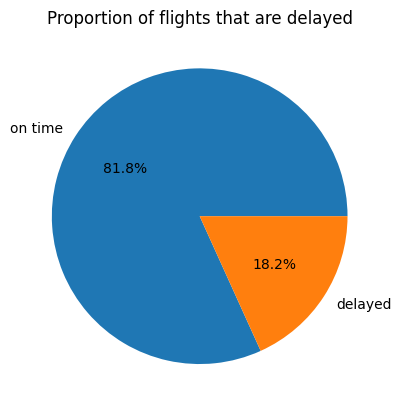

In [5]:
plt.pie(df['DEP_DEL15'].value_counts(), labels=['on time', 'delayed'], autopct='%1.1f%%')
plt.title('Proportion of flights that are delayed')
plt.show()

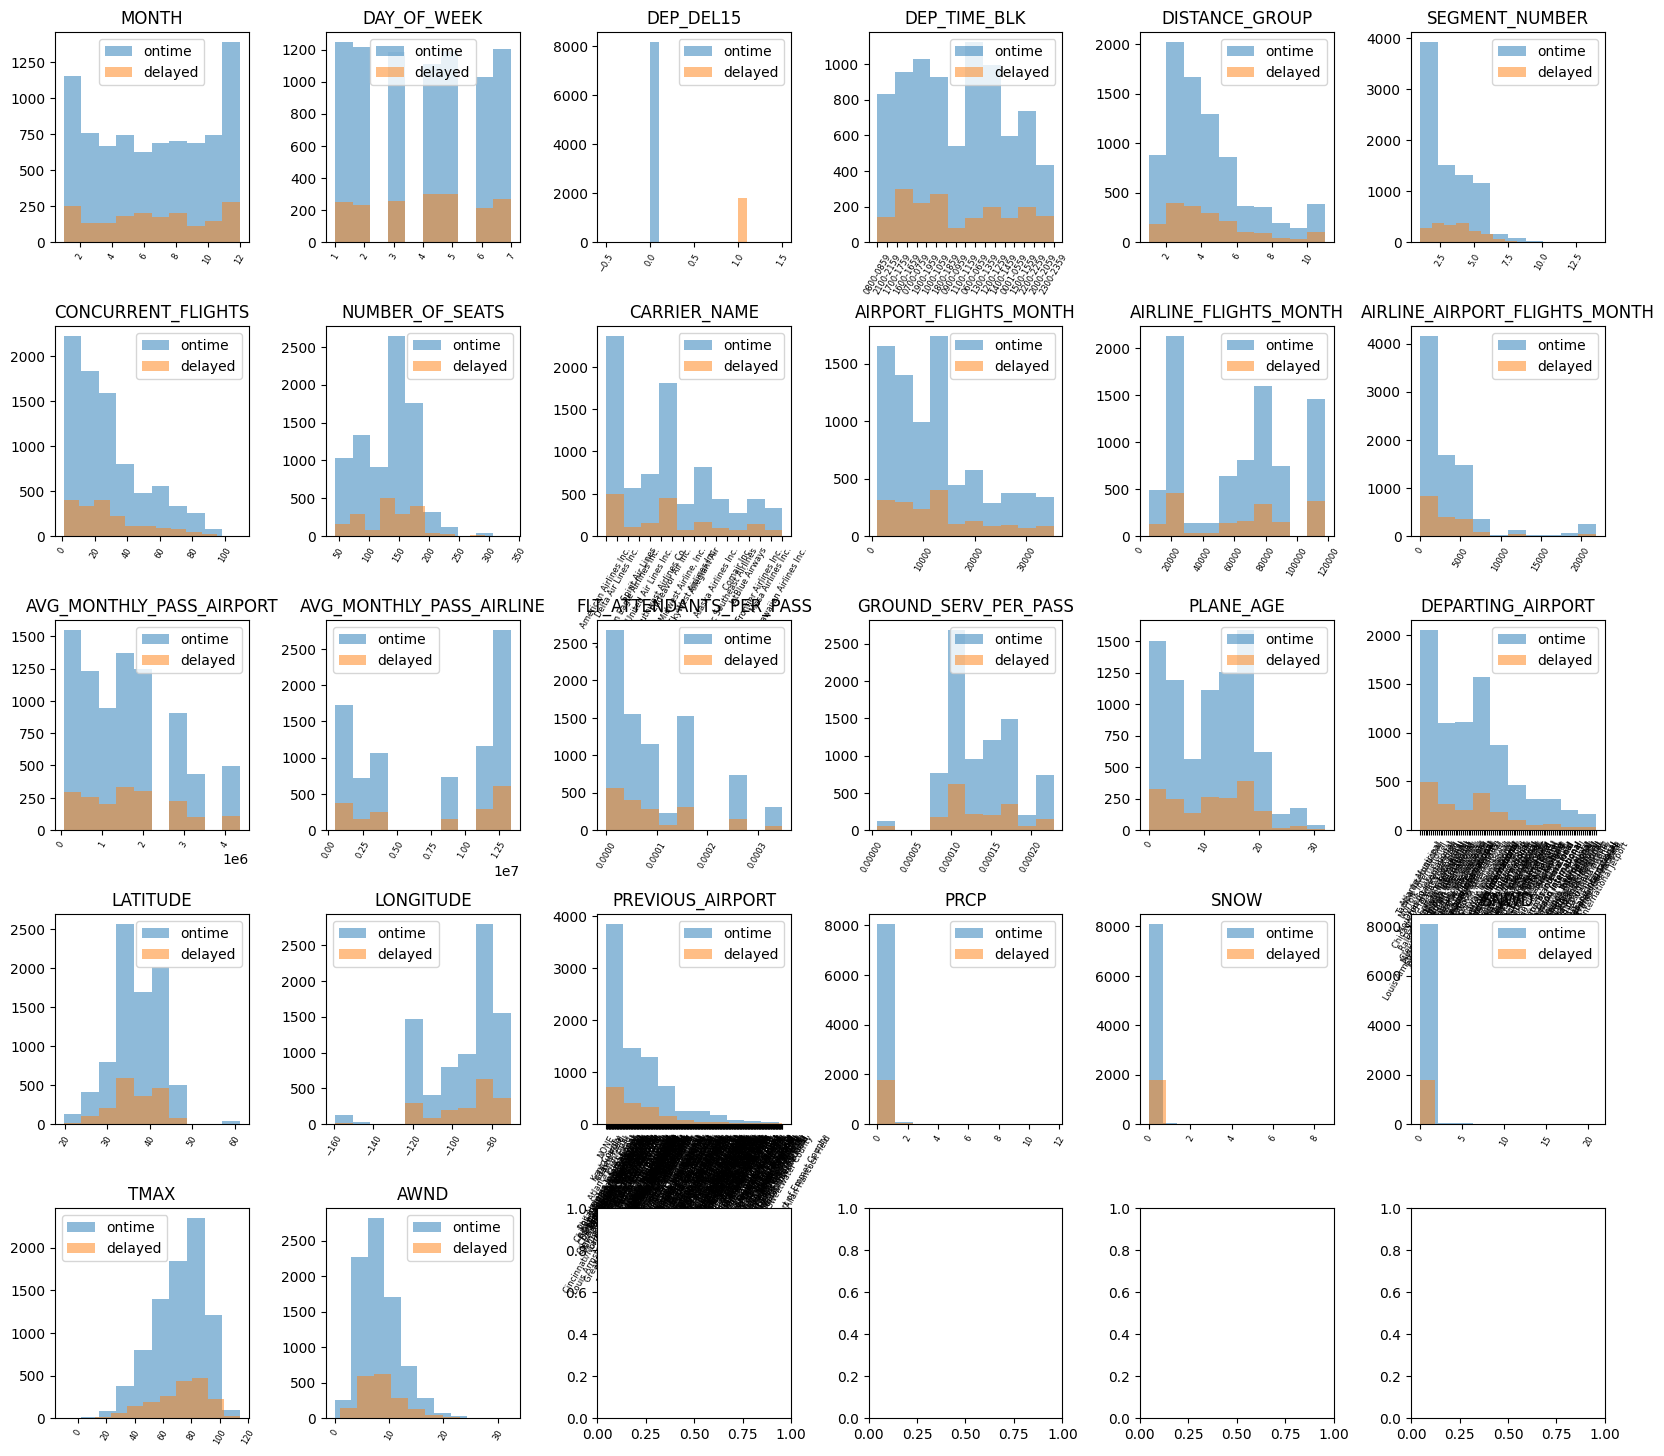

In [6]:
# Inital EDA
# Plot the columns of the ontime and delayed flights and compare, put all the plots in the same figure
# Create a figure with 5 rows and 6 columns which are well spaced
fig, axs = plt.subplots(5, 6, figsize=(20, 18))

for i, col in enumerate(df.columns):
    ax = axs[i // 6, i % 6]
    ax.hist(ontime[col], alpha=0.5, label='ontime')
    ax.hist(delayed[col], alpha=0.5, label='delayed')
    ax.tick_params(axis='x', rotation=60, labelsize=6)
    ax.set_title(col)
    ax.legend()
plt.subplots_adjust(wspace=0.4, hspace=0.4)
# plt.savefig('flights.png')
plt.show()

In [7]:
# DATA CLEANING
# encode the categorical data
le = LabelEncoder()

def clean_labels_encoder(list_of_labels, df):
    for label in list_of_labels:
        df[label] = le.fit_transform(df[label])
    return df

# clean the labels
list_of_labels = ['CARRIER_NAME', 'DEPARTING_AIRPORT', 'PREVIOUS_AIRPORT', 'DEP_TIME_BLK']
df = clean_labels_encoder(list_of_labels, df)

# Drop the columns that are not needed
# df = df.drop(['CARRIER_HISTORICAL', 'DEP_AIRPORT_HIST', 'DAY_HISTORICAL',
#        'DEP_BLOCK_HIST'], axis=1)

# Fill the missing values
df.fillna(df.mean(), inplace=True)


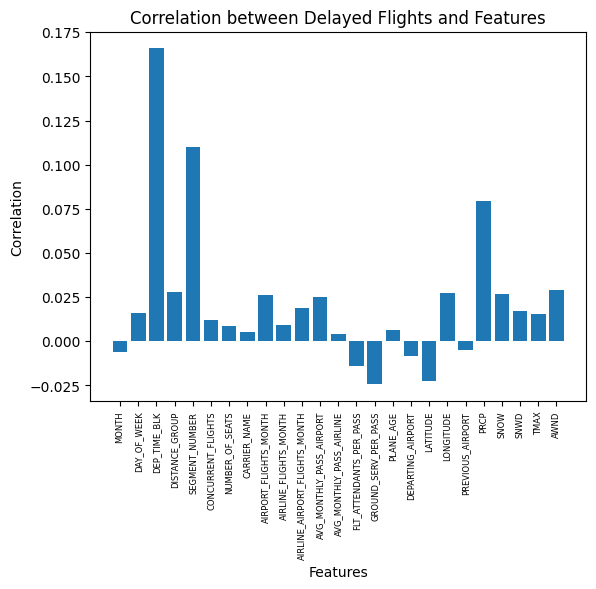

DEP_TIME_BLK                     0.165841
SEGMENT_NUMBER                   0.110103
PRCP                             0.079195
AWND                             0.029255
DISTANCE_GROUP                   0.027949
LONGITUDE                        0.027434
SNOW                             0.026665
AIRPORT_FLIGHTS_MONTH            0.025948
AVG_MONTHLY_PASS_AIRPORT         0.024858
AIRLINE_AIRPORT_FLIGHTS_MONTH    0.018791
SNWD                             0.017240
DAY_OF_WEEK                      0.016116
TMAX                             0.015229
CONCURRENT_FLIGHTS               0.012084
AIRLINE_FLIGHTS_MONTH            0.009144
NUMBER_OF_SEATS                  0.008761
PLANE_AGE                        0.006229
CARRIER_NAME                     0.005165
AVG_MONTHLY_PASS_AIRLINE         0.003998
PREVIOUS_AIRPORT                -0.004815
MONTH                           -0.006062
DEPARTING_AIRPORT               -0.008574
FLT_ATTENDANTS_PER_PASS         -0.014032
LATITUDE                        -0

In [8]:
# FEATURE ENGINEERING
# Calculate the correlation between DEP_DEL15 and the other columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation = df[numeric_cols].corr()['DEP_DEL15']
correlation = correlation.drop(['DEP_DEL15'])


#print(correlation)

# Plot the correlation
plt.bar(correlation.index, correlation)
plt.xticks(rotation=90)
plt.tick_params(axis='x', rotation=90, labelsize=6)
plt.ylabel('Correlation')
plt.xlabel('Features')
plt.title("Correlation between Delayed Flights and Features")
plt.show()


# Sort the correlation
correlation = correlation.sort_values(ascending=False)
print(correlation)

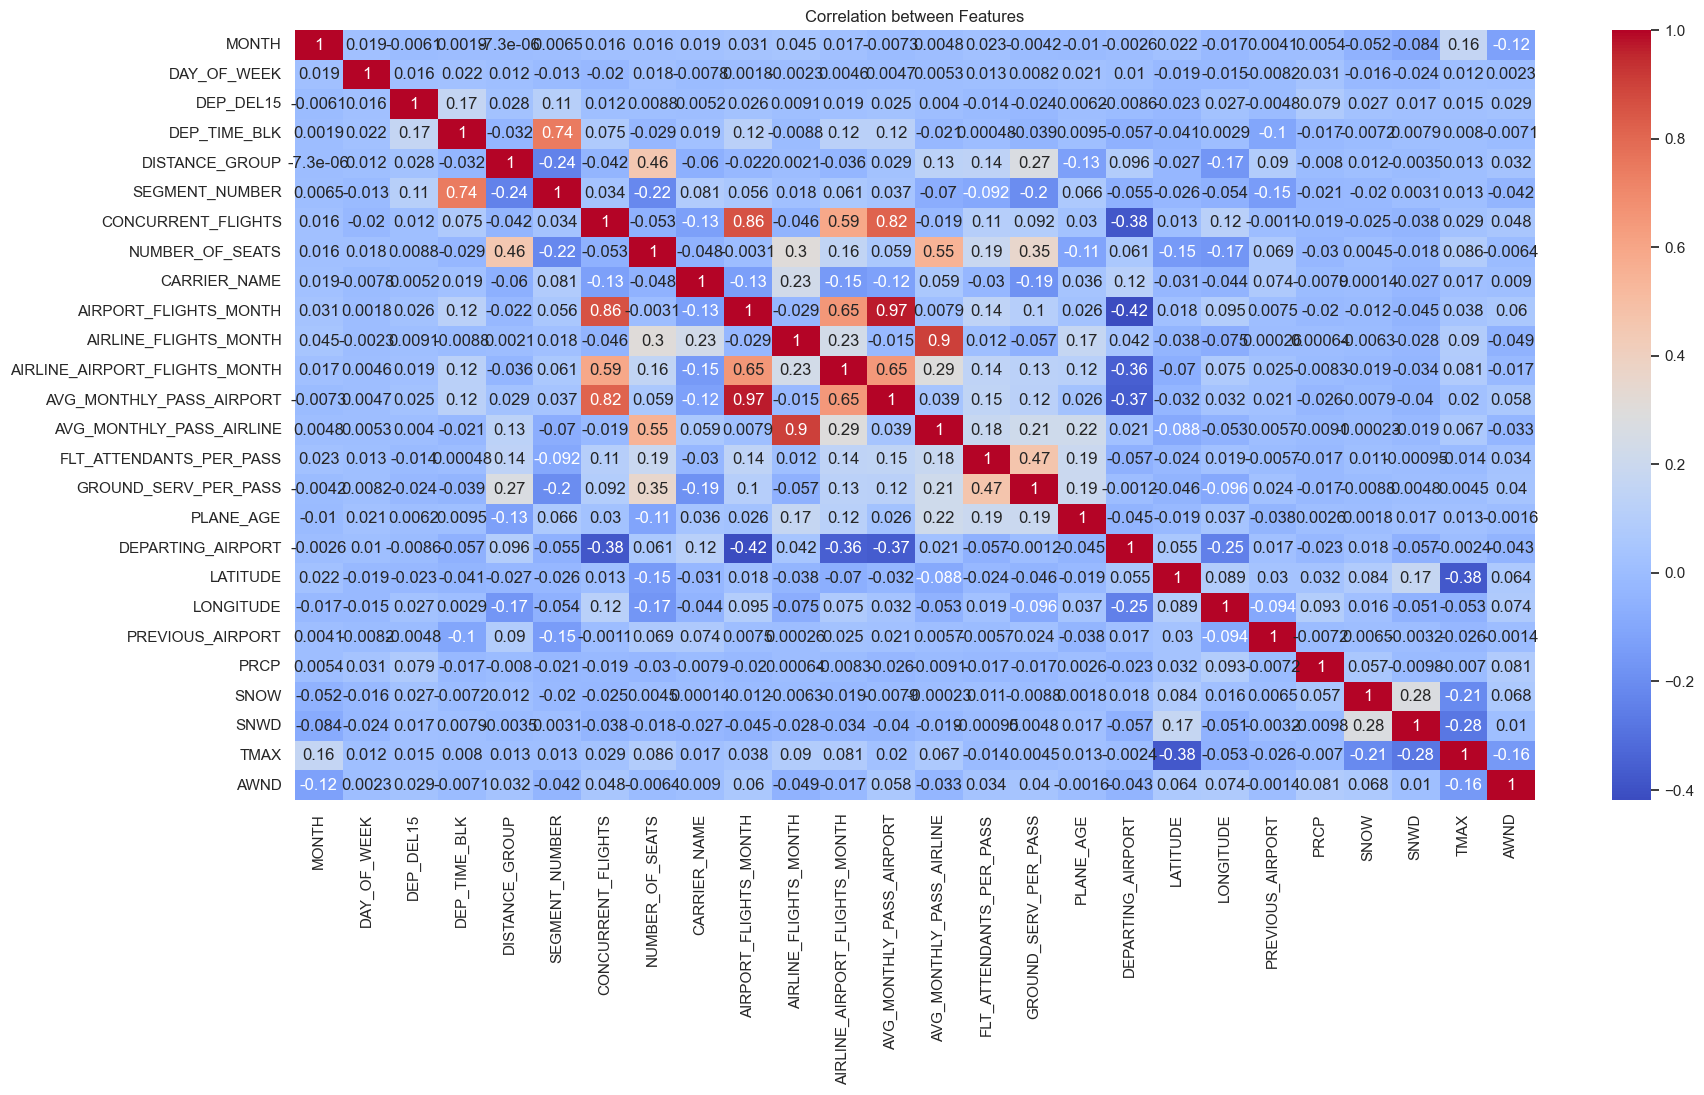

In [9]:
# Plot some heatmaps to see the correlation between the features


def plot_heatmap(df):
    plt.figure(figsize=(20, 10))
    sns.set_theme(style='whitegrid', context='notebook')
    cols = [0, 1, 2]
    sns.heatmap(df.corr(), annot=True, square=False, cmap='coolwarm')
    plt.title('Correlation between Features')
    plt.show()

plot_heatmap(df)

0.821
Cross Validation value is  0.8195
[[1632    5]
 [ 353   10]]
              precision    recall  f1-score   support

           0       0.82      1.00      0.90      1637
           1       0.67      0.03      0.05       363

    accuracy                           0.82      2000
   macro avg       0.74      0.51      0.48      2000
weighted avg       0.79      0.82      0.75      2000

0.5122469208102574


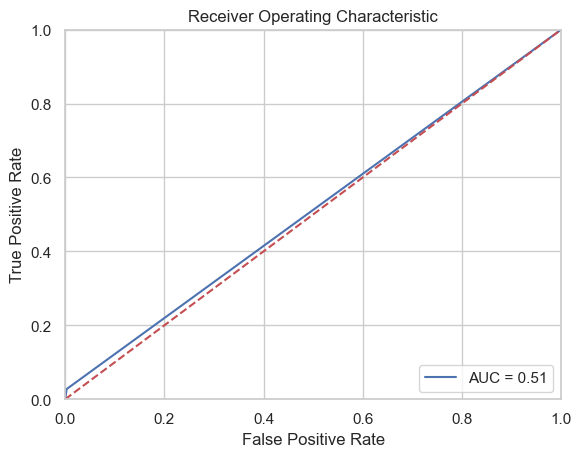

In [10]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve, auc
# Split the data into training and testing data
def performTraining(df):
    X = df.drop('DEP_DEL15', axis=1)
    y = df['DEP_DEL15']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    weights = (y == 0).sum() / (1.0 * (y == 1).sum())
    rf = RandomForestClassifier(n_estimators=100,class_weight={0: 1, 1: weights},random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)

    print(accuracy_score(y_test, y_pred))
    print("Cross Validation value is ",np.mean(cross_val_score(rf ,X_test,y_test,cv=5)))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(roc_auc_score(y_test, y_pred))
    fpr, tpr, threshold = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # method I: plt
    import matplotlib.pyplot as plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

performTraining(df)

0.78
Cross Validation value is  0.795
[[1541   96]
 [ 344   19]]
              precision    recall  f1-score   support

           0       0.82      0.94      0.88      1637
           1       0.17      0.05      0.08       363

    accuracy                           0.78      2000
   macro avg       0.49      0.50      0.48      2000
weighted avg       0.70      0.78      0.73      2000

0.4968488685376562


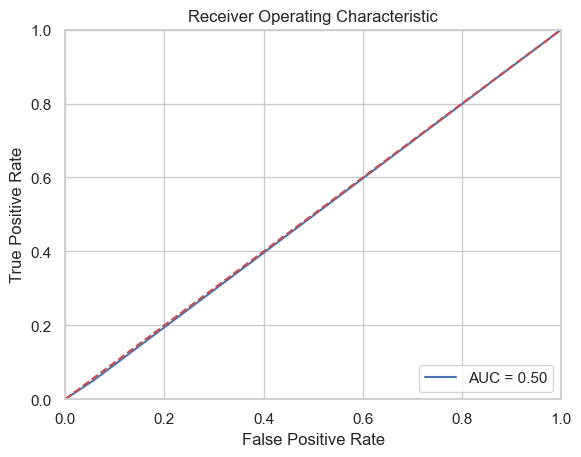

In [11]:
def performKNearest(df):
    X = df.drop('DEP_DEL15', axis=1)
    y = df['DEP_DEL15']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)


    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)


    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(accuracy_score(y_test, y_pred))
    print("Cross Validation value is ",np.mean(cross_val_score(model ,X_test,y_test,cv=5)))

    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(roc_auc_score(y_test, y_pred))
    fpr, tpr, threshold = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # method I: plt
    import matplotlib.pyplot as plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

performKNearest(df)



0.6985
Cross Validation value is  0.7195
[[1356  281]
 [ 322   41]]
              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1637
           1       0.13      0.11      0.12       363

    accuracy                           0.70      2000
   macro avg       0.47      0.47      0.47      2000
weighted avg       0.68      0.70      0.69      2000

0.47064609554196934


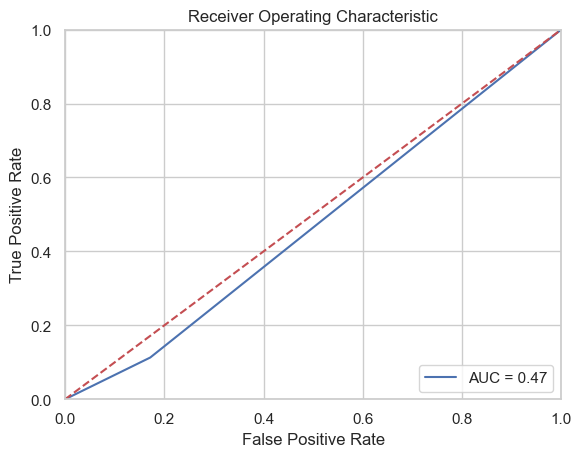

In [12]:
def performSVM(df):
    
    X = df.drop('DEP_DEL15', axis=1)
    y = df['DEP_DEL15']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    model = SVC(C=1.0, kernel='sigmoid', degree=26, gamma='scale')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(accuracy_score(y_test, y_pred))
    print("Cross Validation value is ",np.mean(cross_val_score(model ,X_test,y_test,cv=5)))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(roc_auc_score(y_test, y_pred))
    fpr, tpr, threshold = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # method I: plt
    import matplotlib.pyplot as plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

performSVM(df)



0.8185
Cross Validation value is  0.8094999999999999
[[1628    9]
 [ 354    9]]
              precision    recall  f1-score   support

           0       0.82      0.99      0.90      1637
           1       0.50      0.02      0.05       363

    accuracy                           0.82      2000
   macro avg       0.66      0.51      0.47      2000
weighted avg       0.76      0.82      0.74      2000

0.5096477632435871


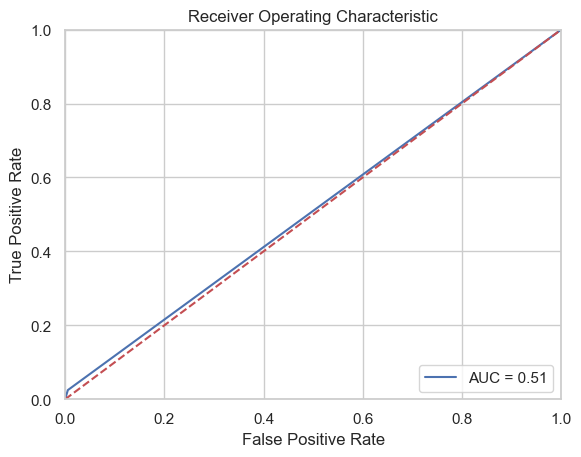

In [13]:
from sklearn.ensemble import GradientBoostingClassifier

def performBoosting(df):
    X = df.drop('DEP_DEL15', axis=1)
    y = df['DEP_DEL15']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    
    model = GradientBoostingClassifier()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(accuracy_score(y_test, y_pred))
    print("Cross Validation value is ",np.mean(cross_val_score(model ,X_test,y_test,cv=5)))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(roc_auc_score(y_test, y_pred))
    fpr, tpr, threshold = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # method I: plt
    import matplotlib.pyplot as plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

performBoosting(df)

0.708
Cross Validation value is  0.7609999999999999
[[1242  395]
 [ 189  174]]
              precision    recall  f1-score   support

           0       0.87      0.76      0.81      1637
           1       0.31      0.48      0.37       363

    accuracy                           0.71      2000
   macro avg       0.59      0.62      0.59      2000
weighted avg       0.77      0.71      0.73      2000

0.6190218955254775


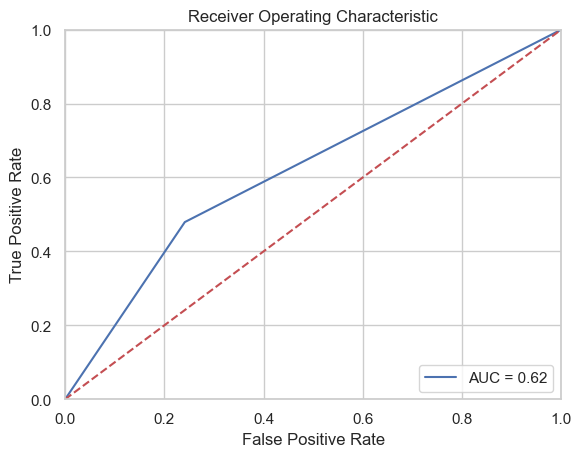

In [ ]:
from lightgbm import LGBMClassifier

def performlgbm(df):
    X = df.drop('DEP_DEL15', axis=1)
    y = df['DEP_DEL15']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    weights = (y == 0).sum() / (1.0 * (y == 1).sum())
    model = LGBMClassifier(boosting_type='dart',n_estimators=300, num_leaves=21,class_weight={0: 1, 1: weights}, verbose=-1, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(accuracy_score(y_test, y_pred))
    print("Cross Validation value is ",np.mean(cross_val_score(model ,X_test,y_test,cv=5)))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(roc_auc_score(y_test, y_pred))
    fpr, tpr, threshold = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # method I: plt
    import matplotlib.pyplot as plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

performlgbm(df)


[LightGBM] [Info] Number of positive: 1460, number of negative: 6540
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000419 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1971
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.182500 -> initscore=-1.499501
[LightGBM] [Info] Start training from score -1.499501
[LightGBM] [Info] Number of positive: 1460, number of negative: 6540
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000300 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1957
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.182500 -> initscore=-1.499501
[LightGBM] [Info] Start training from score -1.499501
[LightGBM] [

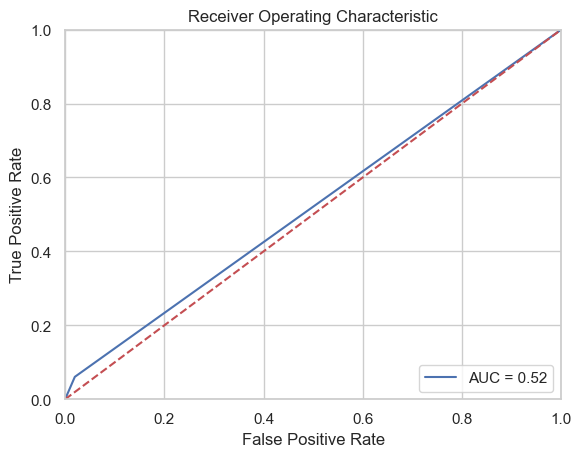

In [15]:
from sklearn.feature_selection import RFE

def performRecursiveFeatureElimination(df):
    X = df.drop('DEP_DEL15', axis=1)
    y = df['DEP_DEL15']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    model = LGBMClassifier()
    n_features_to_select = 20
    rfe = RFE(model, n_features_to_select=n_features_to_select)
    rfe.fit(X_train, y_train)
    # model.fit(X_train, y_train)
    y_pred = rfe.predict(X_test)

    print(accuracy_score(y_test, y_pred))
    print("Cross Validation value is ",np.mean(cross_val_score(model ,X_test,y_test,cv=5)))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(roc_auc_score(y_test, y_pred))
    fpr, tpr, threshold = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)



    # method I: plt
    import matplotlib.pyplot as plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

performRecursiveFeatureElimination(df)



In [16]:
from sklearn.linear_model import LogisticRegression

def performRegression(df):
    X = df.drop('DEP_DEL15', axis=1)
    y = df['DEP_DEL15']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

    # scaler = MinMaxScaler()
    # X_train = scaler.fit_transform(X_train)
    # X_test = scaler.transform(X_test)

    model = LogisticRegression(class_weight='balanced')

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(accuracy_score(y_test, y_pred))
    print("Cross Validation value is ",np.mean(cross_val_score(model ,X_test,y_test,cv=5)))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(roc_auc_score(y_test, y_pred))


performRegression(df)


0.208
Cross Validation value is  0.5415
[[  59 1578]
 [   6  357]]
              precision    recall  f1-score   support

           0       0.91      0.04      0.07      1637
           1       0.18      0.98      0.31       363

    accuracy                           0.21      2000
   macro avg       0.55      0.51      0.19      2000
weighted avg       0.78      0.21      0.11      2000

0.5097563068907547


DEP_DEL15
1    5709
0    5709
Name: count, dtype: int64
0.729
Cross Validation value is  0.8233333333333333
[[2004  464]
 [ 349  183]]
              precision    recall  f1-score   support

           0       0.85      0.81      0.83      2468
           1       0.28      0.34      0.31       532

    accuracy                           0.73      3000
   macro avg       0.57      0.58      0.57      3000
weighted avg       0.75      0.73      0.74      3000

0.5779892397119216


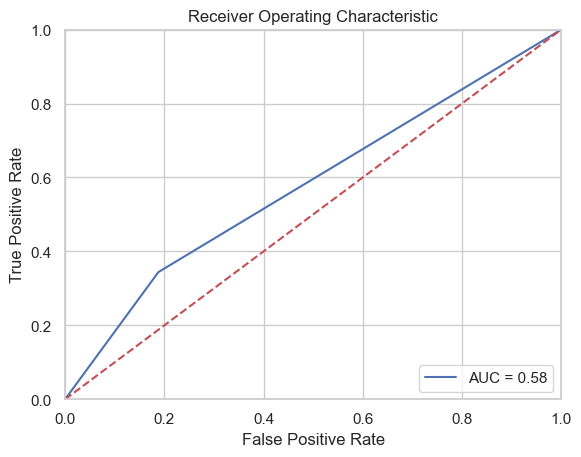

In [79]:
majority_class = df[df['DEP_DEL15'] == 0]
minority_class = df[df['DEP_DEL15'] == 1]


from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

def performSMOTE(df):
    X = df.drop('DEP_DEL15', axis=1)
    y = df['DEP_DEL15']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

    smote = SMOTE()
    X_train, y_train = smote.fit_resample(X_train, y_train)
    print(y_train.value_counts())
    model = RandomForestClassifier(criterion='gini', max_features=0.6, max_depth=10, n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(accuracy_score(y_test, y_pred))
    print("Cross Validation value is ",np.mean(cross_val_score(model ,X_test,y_test,cv=5)))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(roc_auc_score(y_test, y_pred))
    fpr, tpr, threshold = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # method I: plt
    import matplotlib.pyplot as plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

performSMOTE(df)

In [18]:
from sklearn.utils import resample
temp = pd.read_csv("n/full_data_flightdelay.csv.xz", compression='xz')
# Separate majority and minority classes
majority_class = temp[temp['DEP_DEL15'] == 0]
minority_class = temp[temp['DEP_DEL15'] == 1]

# Undersample both classes to 5,000 entries each
minority_undersampled = resample(minority_class, 
                                  replace=False,  # Sample without replacement
                                  n_samples=5000,  # 5,000 samples
                                  random_state=42)  # For reproducibility

majority_undersampled = resample(majority_class, 
                                  replace=False,  # Sample without replacement
                                  n_samples=5000,  # 5,000 samples
                                  random_state=42)

# Combine the undersampled classes
balanced_df = pd.concat([minority_undersampled, majority_undersampled])

# Shuffle the resulting dataset (optional, for randomness)
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

le = LabelEncoder()

def clean_labels_encoder(list_of_labels, balanced_df):
    for label in list_of_labels:
        balanced_df[label] = le.fit_transform(balanced_df[label])
    return balanced_df

# clean the labels
list_of_labels = ['CARRIER_NAME', 'DEPARTING_AIRPORT', 'PREVIOUS_AIRPORT', 'DEP_TIME_BLK']
balanced_df = clean_labels_encoder(list_of_labels, balanced_df)

# Drop the columns that are not needed
# df = df.drop(['CARRIER_HISTORICAL', 'DEP_AIRPORT_HIST', 'DAY_HISTORICAL',
#        'DEP_BLOCK_HIST'], axis=1)

# Fill the missing values
balanced_df.fillna(balanced_df.mean(), inplace=True)



[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000399 seconds.
You can set `force_col_wise=true` to remove the overhead.
0.6145
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000156 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000237 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000229 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000207 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000201 seconds.
You can set `force_col_wise=true` to remove the overhead.
Cro

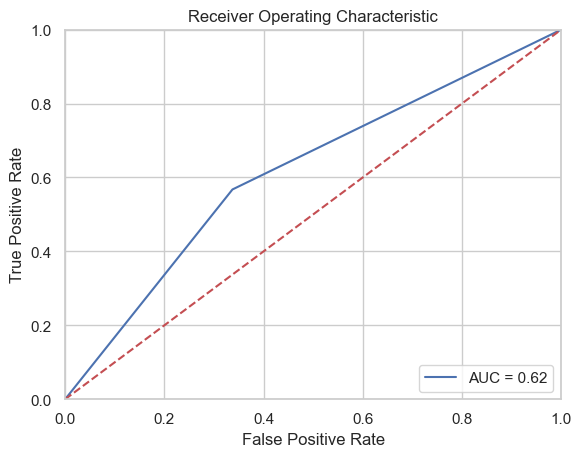

In [39]:
performlgbm(balanced_df)


DEP_DEL15
0    6540
1    6540
Name: count, dtype: int64
[LightGBM] [Info] Number of positive: 6540, number of negative: 6540
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000840 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3951
[LightGBM] [Info] Number of data points in the train set: 13080, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.666667 -> initscore=0.693147
[LightGBM] [Info] Start training from score 0.693147
Best parameters found by Grid Search: {'boosting_type': 'gbdt', 'class_weight': {0: 1, 1: 2}, 'n_estimators': 200, 'num_leaves': 41}
Accuracy: 0.749
Confusion Matrix:
 [[1387  250]
 [ 252  111]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1637
           1       0.31      0.31      0.31       363

    accuracy                           0.75      2000
   macro avg  

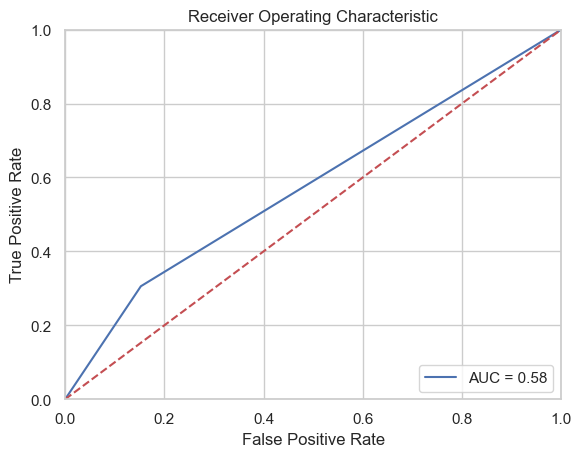

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc

def performSMOTE_with_grid_search(df):
    X = df.drop('DEP_DEL15', axis=1)
    y = df['DEP_DEL15']

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Apply SMOTE
    smote = SMOTE()
    X_train, y_train = smote.fit_resample(X_train, y_train)
    print(y_train.value_counts())

    # Define parameter grid
    param_grid = {
        'n_estimators': [50, 100, 200],
        'num_leaves': [21, 31, 41],
        'boosting_type': ['gbdt', 'dart', 'goss'],
        'class_weight': ['balanced', {0: 1, 1: 1}, {0: 1, 1: 2}]
    }

    # Grid Search
    grid_search = GridSearchCV(estimator=LGBMClassifier(), param_grid=param_grid, 
                               scoring='roc_auc', cv=3, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Best parameters
    print("Best parameters found by Grid Search:", grid_search.best_params_)
    best_model = grid_search.best_estimator_

    # Evaluate model
    evaluate_model(best_model, X_test, y_test)

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
    fpr, tpr, threshold = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # Plot ROC Curve
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

performSMOTE_with_grid_search(df)


[LightGBM] [Info] Number of positive: 1460, number of negative: 6540
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000673 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1983
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.182500 -> initscore=-1.499501
[LightGBM] [Info] Start training from score -1.499501
Best parameters found by Grid Search: {'boosting_type': 'dart', 'class_weight': {0: 1, 1: 1}, 'n_estimators': 50, 'num_leaves': 21}
Accuracy: 0.8185
Confusion Matrix:
 [[1626   11]
 [ 352   11]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.99      0.90      1637
           1       0.50      0.03      0.06       363

    accuracy                           0.82      2000
   macro avg       0.66      0.51      0.48      2000
weighted avg   

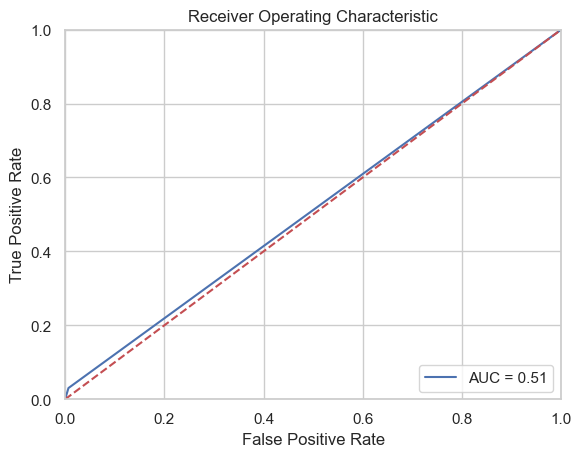

In [81]:
# Run grid search on LGBMClassifier, using weighted classes
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc

def performGridSearch(df):
    X = df.drop('DEP_DEL15', axis=1)
    y = df['DEP_DEL15']

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define parameter grid
    param_grid = {
        'n_estimators': [50, 100, 200],
        'num_leaves': [21, 31, 41],
        'boosting_type': ['gbdt', 'dart', 'goss'],
        'class_weight': ['balanced', {0: 1, 1: 1}, {0: 1, 1: 2}]
    }

    # Grid Search
    grid_search = GridSearchCV(estimator=LGBMClassifier(), param_grid=param_grid, 
                               scoring='roc_auc', cv=3, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Best parameters
    print("Best parameters found by Grid Search:", grid_search.best_params_)
    best_model = grid_search.best_estimator_

    # Evaluate model
    evaluate_model(best_model, X_test, y_test)

performGridSearch(df)
